## 1. adr相關性分析
### 1.1. 各feature varianc分佈

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

training_set = pd.read_csv('../data/train_origin.csv')

exclude_columns = [
        "ID",
        "reservation_status",
        "reservation_status_date",
        "arrival_date_year",
        'arrival_date_week_number',
        'arrival_date_day_of_month'
    ]

categoryFeatures = [
    'hotel',
    'arrival_date_month',
    'meal',
    'country',
    'market_segment',
    'distribution_channel',
    'reserved_room_type',
    'assigned_room_type',
    'deposit_type',
    'agent',
    'company',
    'customer_type',
    'required_car_parking_spaces'
]

training_set = training_set.drop(exclude_columns, axis=1)
training_set = training_set.fillna(value=0)
for feature in categoryFeatures:
    training_set[feature] = training_set[feature].apply(lambda x:str(x))
    training_set[feature] = training_set[feature].astype('category').cat.codes

var = training_set.var().sort_values(ascending=False)
var = pd.DataFrame(var).reset_index()
var.columns = ['feature', 'var']
var['var'] = (var['var']-var['var'].min())/(var['var'].max()-var['var'].min())
print(var)

# plt.subplots(figsize=(12,8))
# sns.barplot(data=var[1:], x='var', y='feature')
# plt.show()

                           feature       var
0                            agent  1.000000
1                        lead_time  0.811880
2                              adr  0.192939
3                          company  0.150720
4                          country  0.121103
5             days_in_waiting_list  0.028983
6               arrival_date_month  0.000928
7             stays_in_week_nights  0.000273
8               assigned_room_type  0.000254
9               reserved_room_type  0.000198
10  previous_bookings_not_canceled  0.000142
11                  market_segment  0.000117
12                            meal  0.000078
13         stays_in_weekend_nights  0.000073
14          previous_cancellations  0.000066
15            distribution_channel  0.000063
16       total_of_special_requests  0.000042
17                 booking_changes  0.000029
18                          adults  0.000026
19                   customer_type  0.000026
20                     is_canceled  0.000016
21        

### 1.2 各 feature 和 adr 的相關性

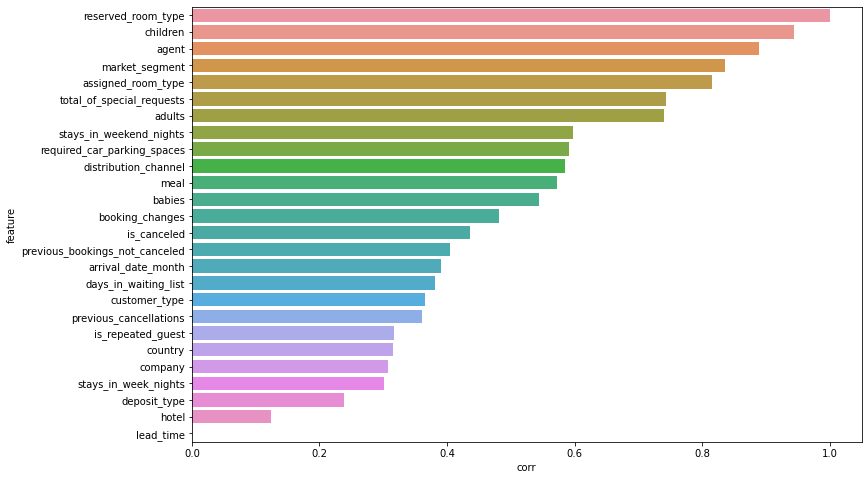

In [54]:
corr = training_set.corr()['adr'].sort_values(ascending=False)

plt.subplots(figsize=(12,8))
corr = pd.DataFrame(corr).reset_index()[1:]
corr.columns = ['feature', 'corr']
corr['corr'] = (corr['corr']-corr['corr'].min())/(corr['corr'].max()-corr['corr'].min())

sns.barplot(data=corr, x='corr', y='feature')
plt.show()

### 1.3 Random Forest 重要性分析

In [72]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=1, max_depth=10)
df=pd.get_dummies(training_set.drop('adr', axis=1))
model.fit(df,training_set.adr)

RandomForestRegressor(max_depth=10, random_state=1)

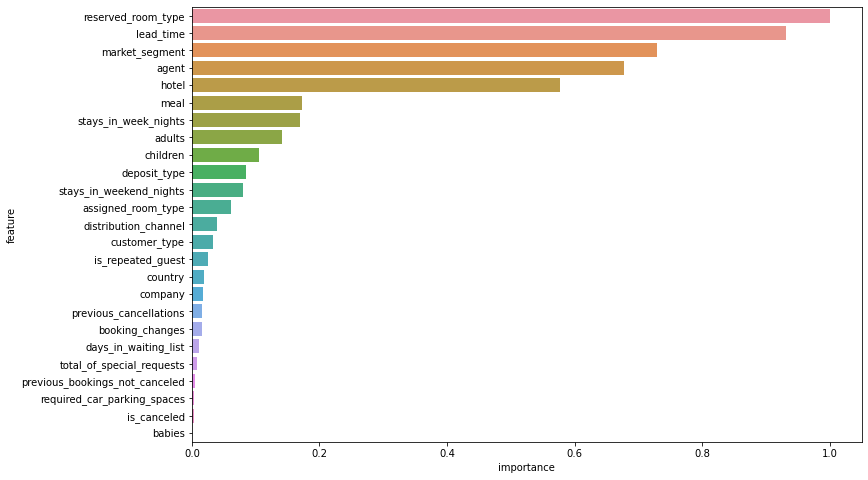

In [73]:
features = df.columns
importances = model.feature_importances_

plt.subplots(figsize=(12,8))
features = pd.DataFrame(features, columns=['feature'])
importances = pd.DataFrame(importances, columns=['importance'])
importances = pd.concat([features, importances], axis=1).sort_values(by='importance', ascending=False)[1:]
importances['importance'] = (importances['importance']-importances['importance'].min())/(importances['importance'].max()-importances['importance'].min())

sns.barplot(data=importances, x='importance', y='feature')
plt.show()

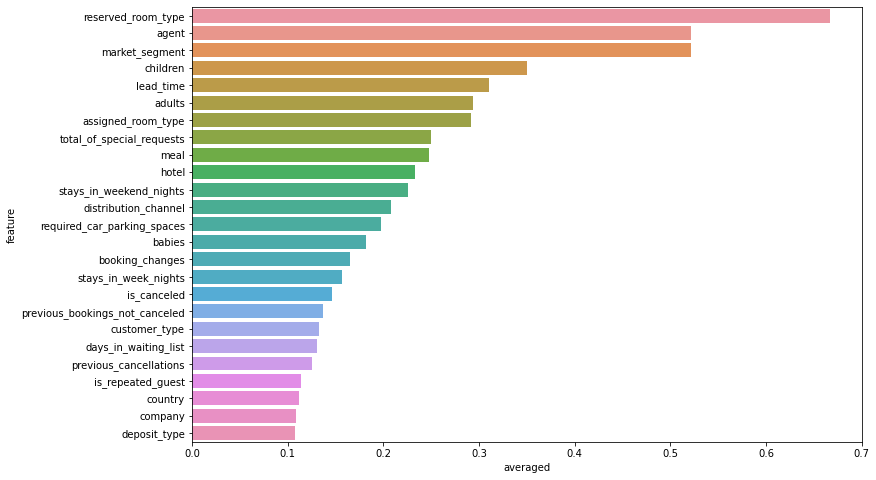

In [74]:
merged = pd.merge(corr, importances, on='feature')
merged['averaged'] = (merged['corr'] + merged['importance']) / 3
merged = merged.sort_values(by='averaged', ascending=False)

plt.subplots(figsize=(12,8))
sns.barplot(data=merged, x='averaged', y='feature')
plt.show()